i have attempted to access the example notebook provided in the EDA google Document but the notebook page keeps loading and nothing shows up so i attempted to follow the same use case steps and  searched for the following implementations myself to attempt to provide a similar one that follows the same rules.

Apologies for how the EDA notebook doesn't seem comprehensive as i was working on my final year project beside the EDA Notebook creation. given more time and better circumstances, i would have provided a more comprehensive report.

This is an EDA notebook designed to analyze and speculate the forseeable growth of two cab companies, the yellow cab and the pink cab to contribute in the decision of investing in any of the companies. the dataset provided includes desriptive and numerical features that can be analyzed. descriptive features include age and gender of customers. it also included the cities where the cabs were used and where data was collected from. the numerical features include the monthly incomes of the customers as well as the population of the cities, users numbers per city, km travelled by each cab in both companies, price charged for each trip and cost of trip without profit. several deductions were made from the provided data such as the identification of the usage of pink/yellow cab by users in each city, the profit margin for each cab driver depending on he company working in and most city acquired with users relative to their populations. some correation were found such as the increase in users number in higher occupancy cities as well as the increase in usage in customers aged between 18 and 42 while less usage from age 43 onwards. it was also found that young customers with high income as well as middle aged customers are the main consumers whereas the rest of the category slightly utilizes the company services.

C:\Users\20101\AppData\Local\Temp\ipykernel_7208\3387369574.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Text(0.5, 1.0, 'Histogram of Cities by both cab Population')

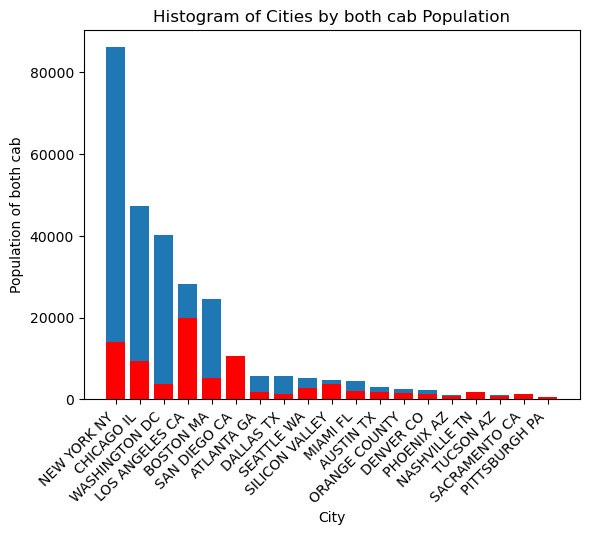

In [1]:
import csv
import openpyxl
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
##loading the cab_data and analysing yellow cab and pink cab companies
## analyze their population in cities
cabdata=open('Cab_Data.csv')
customerdata=open('Customer_ID.csv')
transactions=open('Transaction_ID.csv')
city=open('City.csv')
csvdata=csv.reader(cabdata)
csvcustomer=csv.reader(customerdata)
csvtransaction=csv.reader(transactions)
cities=csv.reader(city)
data1=list(csvdata)
data2=list(csvcustomer)
data3=list(csvtransaction)
data4=list(cities)
pink=[]
yellow=[]
for company in data1[1:]:
    if company[2]=='Pink Cab':
        pink.append(company)
    if company[2]=='Yellow Cab':
        yellow.append(company)
yellow=pandas.DataFrame(yellow)
yellowcounts=yellow[:][3].value_counts()
ycounts_df = pandas.DataFrame({'Item': yellowcounts.index, 'Count': yellowcounts.values})
plt.bar(ycounts_df['Item'],(ycounts_df['Count']))
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.xlabel('City')
#plt.ylabel('Population of yellow cab')
#plt.title('Histogram of Cities by yellow cab Population')
pink=pandas.DataFrame(pink)
pinkcounts=pink[:][3].value_counts()
pcounts_df = pandas.DataFrame({'Item': pinkcounts.index, 'Count': pinkcounts.values})
plt.bar(pcounts_df['Item'],(pcounts_df['Count']),color='red')
#subplt.bar(ycounts_df['Item'],(ycounts_df['Count']),color='blue')

plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.xlabel('City')
plt.ylabel('Population of both cab')
plt.title('Histogram of Cities by both cab Population')
#plt.legend()

The above histogram revealed that new york is a main consumer area for both cab companies. this is mainly due to the increased population in new york as revealed later on in the notebook. chicago, Washington DC, Los Angeles CA and Boston are significantly high in consumption of cab companies after New York. however, Yellow Cab company revealed a remarkable performance in most of the cities in comparison to the pink cab company with an exceptinal performance in New York City. the above bar chart represents a numerical analysis for the amount of users in both companies in each city where the dataset was collected from.

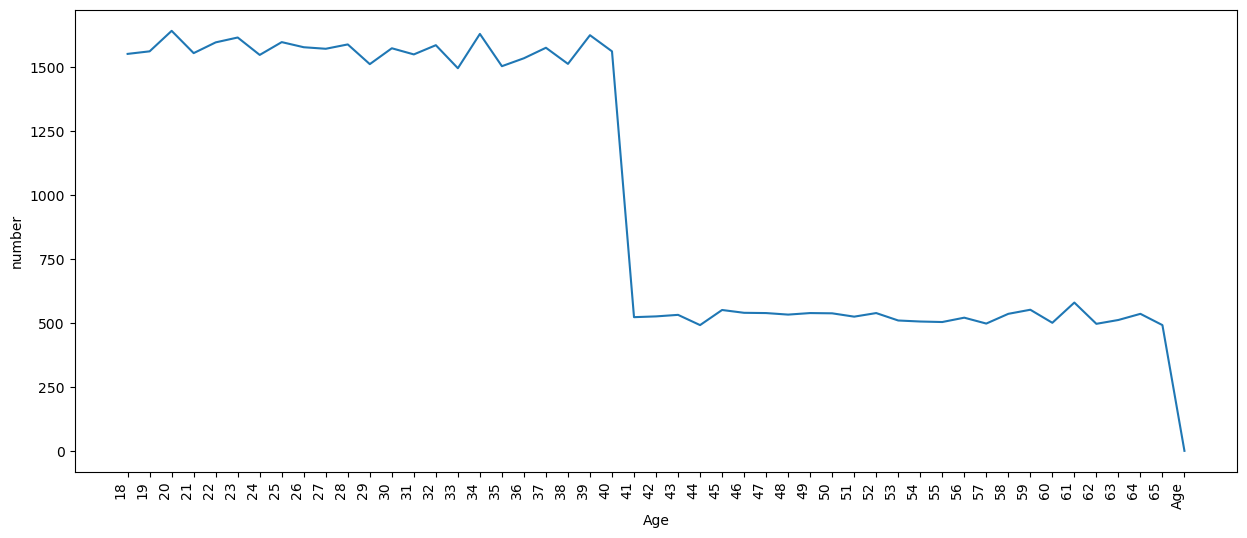

In [88]:
#ages of users and number of users from each age using cab serices
data2=pandas.DataFrame(data2)
ageofusers=data2[:][2].value_counts()
ageofusers=ageofusers.sort_index()
ageofusers=pandas.DataFrame(ageofusers)
ageofusers.columns=['age']
plt.plot(ageofusers)

plt.xlabel('Age')
plt.ylabel('number')
#plt.title('Histogram of Cities by yellow cab Population')
plt.xticks(rotation=90, ha='right')
plt.gcf().set_size_inches(15, 6) 

The above plot reveals the number of users according to their age group. it is believed that the main target consumer is aged between 18 and 43 years old as shown in the above plot. this was a categorical numerical analysis as it utilized the age (categorical side) of the user and the number of users in each age (numerical side).

In [ ]:
df = pandas.read_csv('Cab_Data.csv')
profile=ProfileReport(df)
profile.to_notebook_iframe()

The above code is an attempt to utilize panas profiling system to generate a comprehensive report on th cab dataset provided.

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

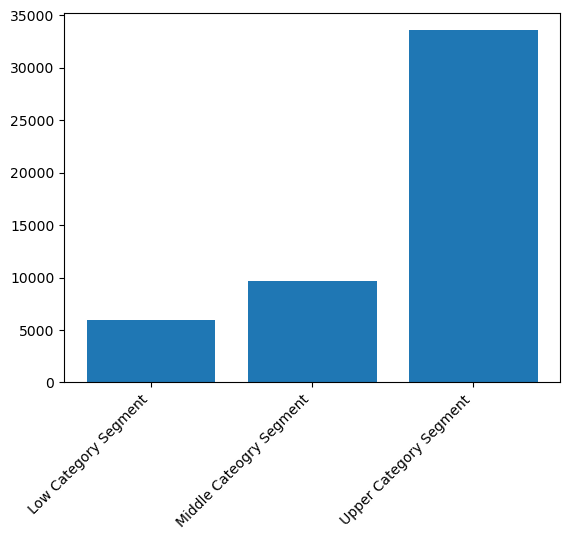

In [95]:
##identify the segment of customers that utilizes the cabs frequently
midcount=0
uppercount=0
lowercount=0
for i in range (1,len(data2)):
    if float((data2[3][i]))>5000 and float(data2[3][i])<10000:
        midcount=midcount+1
    elif  float((data2[3][i]))<5000:
        lowercount=lowercount+1
    else:
        uppercount=uppercount+1
count=[lowercount,midcount,uppercount]
category=['Low Category Segment','Middle Cateogry Segment','Upper Category Segment']
plt.bar(category,count)
plt.xticks(rotation=45, ha='right')

This part of analysis was designed to identify the category of the consumers that utlizes the cab services. it assessed the users depending on their income salary and it found out that upper category segment, salary more than 10,000 per month, is the main consumer for the cab services followed by them is the middle class type that earns between 5,000 and 10,000 per month and ending with the low earning category that earns up to 5,000 per month. it deduced that consumers aged between 18 to 43 earning more than 10,000 per months in cities such as new york are potentially the ideal customers for both cab companies. this was also a considered as a categorical and numerical analysis.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

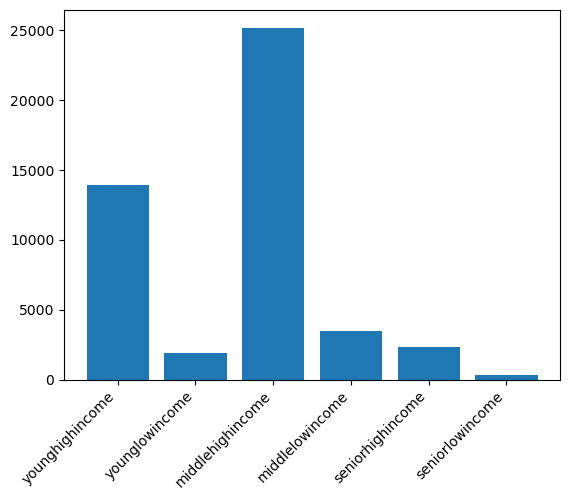

In [96]:
ages=[]
incomes=[]
data2=pandas.DataFrame(data2)
#incomes=list(data2[3][:])
#ages=list(data2[2][:])
#plt.plot(ages,incomes)
#plt.gcf().set_size_inches(30, 10) 
younghighincome=0
middlehighincome=0
seniorhighincome=0
younglowincome=0
middlelowincome=0
seniorlowincome=0
#ages
for i in range (1,len(data2)):
    if float(data2[2][i])<28 and float(data2[3][i])>5000:
        younghighincome=younghighincome+1
    elif float(data2[2][i])>28 and float(data2[2][i])<60 and float(data2[3][i])>5000:
        middlehighincome=middlehighincome+1
    elif float(data2[2][i])>60 and float(data2[3][i])>5000:
        seniorhighincome=seniorhighincome+1
    elif float(data2[2][i])<28 and float(data2[3][i])<5000:
        younglowincome=younglowincome+1
    elif float(data2[2][i])>28 and float(data2[2][i])<60 and float(data2[3][i])<5000:
        middlelowincome=middlelowincome+1
    elif float(data2[2][i])>60 and float(data2[3][i])<5000:
        seniorlowincome=seniorlowincome+1
 
values=[younghighincome,younglowincome,middlehighincome,middlelowincome,seniorhighincome,seniorlowincome]
incomes=['younghighincome','younglowincome','middlehighincome','middlelowincome','seniorhighincome','seniorlowincome']
plt.bar(incomes,values)
plt.xticks(rotation=45, ha='right')       
#data2[3][:]

The above bar diagram analysis was designed to identify the age group that earns the highest monthly income. it was also designed to divide the consumers recorded into categories to provide more clarity about the potential customers attributes. it has revealed that consumers aged lower than 28, considered young group, earns more than 10,000 per month putting them in the young and high income section. it also revealed that the highest earning age group is between 28 and 43 years old with salaries reaching 25,000 per month. thus reachinga conclusion of a potential focusing on the middle aged group and young group to invite more of this consumer category to utilize the cab sevices while provide incentives and affordable services to the other groups such as seniors and low income category fom all age groups to utilize the services. the Yellow Cab Company is revealing remarkable achievements in most of the cities which allows for a better speculations in the next years. 

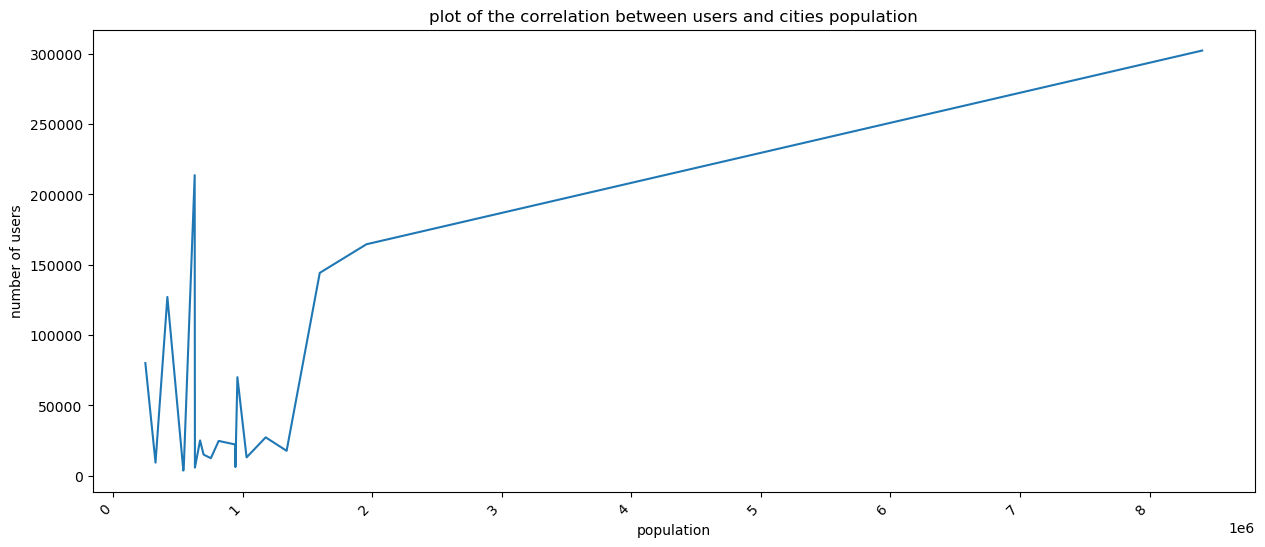

In [97]:
data4=pandas.DataFrame(data4)
users=[]
population=[]
for i in range(1, len(data4)):
    s=float(data4[1][i].replace(',', '').strip())
    a=float(data4[2][i].replace(',', '').strip())

    users.append(s)
    population.append(a)
plt.plot(users,population)
plt.xticks(rotation=45, ha='right')
plt.xlabel('population')
plt.ylabel('number of users')
plt.title('plot of the correlation between users and cities population')

plt.gcf().set_size_inches(15, 6) 

The above diagram reveals a correlation between the increase in population in cities and the increase in services utilisation. this leads to the relisation of targeting higher poulation cities. as it can be promising to expect a hgher return on investment from these citis accoding to the provided data.

In [67]:
x=pandas.DataFrame(data3)
x2=pandas.DataFrame(data2)

In [68]:
transactioncounts=x[:][1].value_counts()

In [79]:
agelist = [ ]
for i in range(0, len(transactioncounts)):
    value = x2.loc[x2[0] == transactioncounts.index[i]].values
    agelist.append(value[0][2])

In [86]:
count=0
for i in agelist:
    if agelist[count]=='Age':
        agelist[count]=='0'
    agelist[count]=float(i)
    count=count+1

In [77]:
transactioncounts=transactioncounts[transactioncounts.values>0]

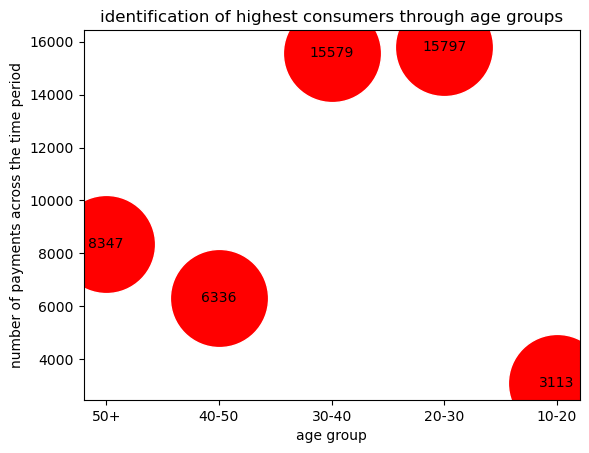

In [94]:
seniors=0
#50 and above
uppermid=0
#50-40
lowermid=0
#40-30
youngadults=0
#30-20
teens=0
#20-10
for i in agelist:
    if i >=50:
        seniors=seniors+1
    elif i<50 and i >=40:
        uppermid=uppermid+1
    elif i<40 and i >=30:
        lowermid=lowermid+1
    elif i<30 and i>=20:
        youngadults=youngadults+1
    else:
        teens=teens+1
allgroups=[seniors, uppermid,lowermid,youngadults,teens]
agenum = ['50+','40-50','30-40','20-30','10-20']
plt.scatter(agenum,allgroups,s=5000, c='red', edgecolors='white')

for i in range(len(agenum)):
    plt.text(agenum[i], allgroups[i], allgroups[i], ha='center', va='center')

plt.xlabel('age group')
plt.ylabel('number of payments across the time period')
plt.title('identification of highest consumers through age groups')

# Display the plot
plt.show()

#agelist


The above plot provides a detailed analysis on the age group with the most payments through the provided time period. the increase in time periods reflects the amount of usage of the cab companies by customers. to acquire the above plot, it was identified the amount of payments made by each customer through counting the appearance of each customers idin the transaction sheet. it then proceeded to identifying the age of each customer by their customer ids from the customer id sheet. after the identification of each customers ages, it was best to group customers into age groups to create a more presentable plot. age groups were divided into 50+, 50-40,40-30,30-20 and 20-10. The plot revealed the spike in the transactions of users aged between 20-30 and 30-40 which are considered young adults and lower middle aged adults. the seniors (50+) came in second after the first two groups. this is a categorical and numerical analysis as age groups are being compared to number of transactions.

In [134]:
#pink profits
profitperkm=[]
pinkprice=[]
pinkcost=[]
profit=[]
km=[]
profitcount=0
profitmean=0
ppkmmean=0
kmcount=0
for i in range(0, len(pink)):
    pinkprice.append(float(pink[5][i]))
    pinkcost.append(float(pink[6][i]))
    km.append(float(pink[4][i]))
    profit.append(pinkprice[i]-pinkcost[i])
    profitcount=profitcount+profit[i]#
    profitperkm.append(profit[i]/km[i])#profit per km
    kmcount=kmcount+profitperkm[i]#total profit per km
profitmean=profitcount/len(profit)# mean of the total profit with no consideration to km price charge
ppkmmean=kmcount/len(profit)#mean profit per km

In [122]:
profitmean

62.652174109619416

In [127]:
kmcount

1911073.1099999654

In [135]:
ppkmmean

2.769907700396525

In [137]:
#yellow profits
profitperkm=[]
yellowprice=[]
yellowcost=[]
profit=[]
km=[]
profitcount=0
profitmean=0
ppkmmean=0
kmcount=0
for i in range(0, len(yellow)):
    yellowprice.append(float(yellow[5][i]))
    yellowcost.append(float(yellow[6][i]))
    km.append(float(yellow[4][i]))
    profit.append(yellowprice[i]-yellowcost[i])
    profitcount=profitcount+profit[i]#
    profitperkm.append(profit[i]/km[i])#profit per km
    kmcount=kmcount+profitperkm[i]#total profit per km
profitmean=profitcount/len(profit)# mean of the total profit with no consideration to km price charge
ppkmmean=kmcount/len(profit)#mean profit per km

In [138]:
profitmean#profit per ride mean

160.25998584102985

In [139]:
ppkmmean# price per km mean

7.105507808353063

The above cells are used to calculate the average profit per ride for eachcompany and the profit per km for yellow and pink cab services.